# Análise da população brasileira

Uma coisa importante na análise de dados é entender o contexto dos dados coletados, qual a realidade que eles estão inseridos. 

Por exemplo:
**Parece aceitável que mais da metade do congresso seja formada por homens brancos se esse grupo demográfico for mais da metade da população?** Nesse caso nós poderíamos pensar que existes mais indivíduos desse grupo na população e que por isso eles tem uma grande representatividade no congresso.

Já que estamos falando do congresso, vamos então tentar entender qual é o contexto das informações que vimos na análise anterior:
- Qual o perfil da população brasileira quanto a gênero, cor ou raça e situação do domicílio?
- Como esse perfil se comporta quando analisamos por estado?


Os dados aqui analisados são do censo de 2010, disponível pelo SIDRA [Sistema IBGE de Recuperação Automática](https://sidra.ibge.gov.br/home/pms/brasil) [Nessa tabela](https://sidra.ibge.gov.br/tabela/3175)

## Preparando os dados

In [86]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [140]:
populacao = pd.read_csv('data/populacao/populacao_idade_agregada.csv', delimiter=';', header=2)
populacao

,Unidade da Federação,Sexo,Idade,Ano,Cor ou raça,Situação do domicílio,Unnamed: 6
0,Rondônia,Homens,0 a 4 anos,2010.0,Branca,Urbana,18720
1,Rondônia,Homens,0 a 4 anos,2010.0,Branca,Rural,6024
2,Rondônia,Homens,0 a 4 anos,2010.0,Preta,Urbana,1755
3,Rondônia,Homens,0 a 4 anos,2010.0,Preta,Rural,580
4,Rondônia,Homens,0 a 4 anos,2010.0,Amarela,Urbana,643
5,Rondônia,Homens,0 a 4 anos,2010.0,Amarela,Rural,162
6,Rondônia,Homens,0 a 4 anos,2010.0,Parda,Urbana,26827
7,Rondônia,Homens,0 a 4 anos,2010.0,Parda,Rural,9230
8,Rondônia,Homens,0 a 4 anos,2010.0,Indígena,Urbana,116
9,Rondônia,Homens,0 a 4 anos,2010.0,Indígena,Rural,793


In [143]:
populacao = populacao[:9072]
populacao

,Unidade da Federação,Sexo,Idade,Ano,Cor ou raça,Situação do domicílio,Unnamed: 6
0,Rondônia,Homens,0 a 4 anos,2010.0,Branca,Urbana,18720
1,Rondônia,Homens,0 a 4 anos,2010.0,Branca,Rural,6024
2,Rondônia,Homens,0 a 4 anos,2010.0,Preta,Urbana,1755
3,Rondônia,Homens,0 a 4 anos,2010.0,Preta,Rural,580
4,Rondônia,Homens,0 a 4 anos,2010.0,Amarela,Urbana,643
5,Rondônia,Homens,0 a 4 anos,2010.0,Amarela,Rural,162
6,Rondônia,Homens,0 a 4 anos,2010.0,Parda,Urbana,26827
7,Rondônia,Homens,0 a 4 anos,2010.0,Parda,Rural,9230
8,Rondônia,Homens,0 a 4 anos,2010.0,Indígena,Urbana,116
9,Rondônia,Homens,0 a 4 anos,2010.0,Indígena,Rural,793


In [144]:
populacao.columns

Index(['Unidade da Federação', 'Sexo', 'Idade', 'Ano', 'Cor ou raça',
       'Situação do domicílio', 'Unnamed: 6'],
      dtype='object')

In [145]:
populacao = populacao.rename(columns={'Unnamed: 6': "Quantidade", 'Unidade da Federação': "Estado"})
populacao[:15]

,Estado,Sexo,Idade,Ano,Cor ou raça,Situação do domicílio,Quantidade
0,Rondônia,Homens,0 a 4 anos,2010.0,Branca,Urbana,18720
1,Rondônia,Homens,0 a 4 anos,2010.0,Branca,Rural,6024
2,Rondônia,Homens,0 a 4 anos,2010.0,Preta,Urbana,1755
3,Rondônia,Homens,0 a 4 anos,2010.0,Preta,Rural,580
4,Rondônia,Homens,0 a 4 anos,2010.0,Amarela,Urbana,643
5,Rondônia,Homens,0 a 4 anos,2010.0,Amarela,Rural,162
6,Rondônia,Homens,0 a 4 anos,2010.0,Parda,Urbana,26827
7,Rondônia,Homens,0 a 4 anos,2010.0,Parda,Rural,9230
8,Rondônia,Homens,0 a 4 anos,2010.0,Indígena,Urbana,116
9,Rondônia,Homens,0 a 4 anos,2010.0,Indígena,Rural,793


Conteúdo sobre [Características Étnico-Raciais da População](https://biblioteca.ibge.gov.br/visualizacao/livros/liv63405.pdf) desenvolvido pelo IBGE.
Ainda sobre [indicadores sociais](https://www.ibge.gov.br/estatisticas-novoportal/sociais.html) existe uma página dedicada dentro do site do IBGE a dispor conteúdo sobre esse tema.

In [146]:
populacao = populacao.replace('-', 0)
populacao = populacao.replace(['Preta', 'Parda'], 'Negra')
populacao[:15]

,Estado,Sexo,Idade,Ano,Cor ou raça,Situação do domicílio,Quantidade
0,Rondônia,Homens,0 a 4 anos,2010.0,Branca,Urbana,18720
1,Rondônia,Homens,0 a 4 anos,2010.0,Branca,Rural,6024
2,Rondônia,Homens,0 a 4 anos,2010.0,Negra,Urbana,1755
3,Rondônia,Homens,0 a 4 anos,2010.0,Negra,Rural,580
4,Rondônia,Homens,0 a 4 anos,2010.0,Amarela,Urbana,643
5,Rondônia,Homens,0 a 4 anos,2010.0,Amarela,Rural,162
6,Rondônia,Homens,0 a 4 anos,2010.0,Negra,Urbana,26827
7,Rondônia,Homens,0 a 4 anos,2010.0,Negra,Rural,9230
8,Rondônia,Homens,0 a 4 anos,2010.0,Indígena,Urbana,116
9,Rondônia,Homens,0 a 4 anos,2010.0,Indígena,Rural,793


In [147]:
populacao.dtypes

Estado                    object
Sexo                      object
Idade                     object
Ano                      float64
Cor ou raça               object
Situação do domicílio     object
Quantidade                object
dtype: object

In [148]:
populacao['Quantidade'] = populacao['Quantidade'].astype(int)
populacao['Ano'] = populacao['Ano'].astype(object)
populacao.dtypes

Estado                   object
Sexo                     object
Idade                    object
Ano                      object
Cor ou raça              object
Situação do domicílio    object
Quantidade                int64
dtype: object

In [149]:
populacao

,Estado,Sexo,Idade,Ano,Cor ou raça,Situação do domicílio,Quantidade
0,Rondônia,Homens,0 a 4 anos,2010,Branca,Urbana,18720
1,Rondônia,Homens,0 a 4 anos,2010,Branca,Rural,6024
2,Rondônia,Homens,0 a 4 anos,2010,Negra,Urbana,1755
3,Rondônia,Homens,0 a 4 anos,2010,Negra,Rural,580
4,Rondônia,Homens,0 a 4 anos,2010,Amarela,Urbana,643
5,Rondônia,Homens,0 a 4 anos,2010,Amarela,Rural,162
6,Rondônia,Homens,0 a 4 anos,2010,Negra,Urbana,26827
7,Rondônia,Homens,0 a 4 anos,2010,Negra,Rural,9230
8,Rondônia,Homens,0 a 4 anos,2010,Indígena,Urbana,116
9,Rondônia,Homens,0 a 4 anos,2010,Indígena,Rural,793


## Qual o perfil da população brasileira quanto a gênero, cor ou raça e situação do domicílio?

### Gênero

In [150]:
genero = populacao.groupby('Sexo').sum()
genero

,Quantidade
Sexo,
Homens,93406990
Mulheres,97348809


In [151]:
genero_porcentagem = genero['Quantidade']/sum(genero['Quantidade'])
genero_porcentagem

Sexo
Homens      0.489668
Mulheres    0.510332
Name: Quantidade, dtype: float64

Verificar estilos disponíveis para os gráficos no matplotlib
É possível como eles se parecem [nesse link](https://matplotlib.org/devdocs/gallery/style_sheets/style_sheets_reference.html)


In [152]:
plt.style.available

['_classic_test',
 'seaborn-paper',
 'seaborn-ticks',
 'seaborn-bright',
 'seaborn-pastel',
 'fast',
 'seaborn-dark',
 'Solarize_Light2',
 'bmh',
 'grayscale',
 'seaborn-notebook',
 'seaborn-dark-palette',
 'seaborn-muted',
 'seaborn',
 'ggplot',
 'seaborn-talk',
 'seaborn-deep',
 'seaborn-colorblind',
 'dark_background',
 'classic',
 'seaborn-whitegrid',
 'seaborn-darkgrid',
 'fivethirtyeight',
 'seaborn-white',
 'seaborn-poster']

Selecionar um estilo

In [153]:
plt.style.use('fivethirtyeight')

Exemplos de [gráficos com matplotlib](https://matplotlib.org/devdocs/gallery/index.html)

Text(0.5,1,'Distribuição da população por gênero')

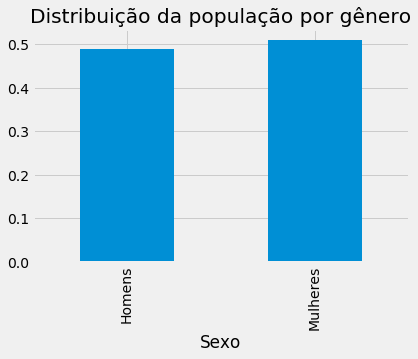

In [154]:
genero_porcentagem.plot(kind='bar')
plt.title('Distribuição da população por gênero')

In [158]:
populacao.groupby('Idade').sum()

,Quantidade
Idade,
0 a 4 anos,13796158
10 a 14 anos,17166761
15 a 19 anos,16990872
20 a 24 anos,17245192
25 a 29 anos,17104414
30 a 34 anos,15744512
35 a 39 anos,13888579
40 a 44 anos,13009364
45 a 49 anos,11833352


In [163]:
cor_ou_raca = populacao.groupby('Cor ou raça').sum()
cor_ou_raca

,Quantidade
Cor ou raça,
Amarela,2084288
Branca,91051646
Indígena,817963
Negra,96795294
Sem declaração,6608


In [165]:
cor_ou_raca_porcentagem = cor_ou_raca['Quantidade']/sum(cor_ou_raca['Quantidade'])
cor_ou_raca_porcentagem

Cor ou raça
Amarela           0.010926
Branca            0.477320
Indígena          0.004288
Negra             0.507430
Sem declaração    0.000035
Name: Quantidade, dtype: float64

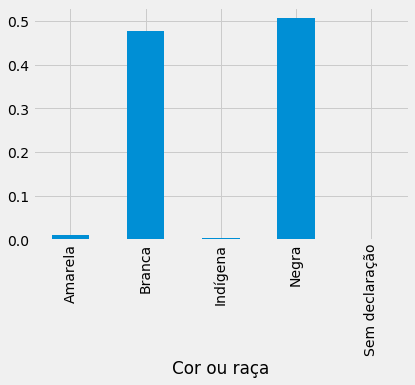

In [166]:
cor_ou_raca_porcentagem.plot(kind='bar')

In [168]:
sexo_cor_ou_raca = populacao.groupby(['Sexo', 'Cor ou raça']).sum()
sexo_cor_ou_raca

Quantidade
Sexo     Cor ou raça               
Homens   Amarela             951404
         Branca            43652488
         Indígena            409907
         Negra             48388475
         Sem declaração        4716
Mulheres Amarela            1132884
         Branca            47399158
         Indígena            408056
         Negra             48406819
         Sem declaração        1892

In [173]:
por_estado = populacao.loc[populacao['Estado']=='Paraíba']
por_estado

,Estado,Sexo,Idade,Ano,Cor ou raça,Situação do domicílio,Quantidade
3696,Paraíba,Homens,0 a 4 anos,2010,Branca,Urbana,52829
3697,Paraíba,Homens,0 a 4 anos,2010,Branca,Rural,16256
3698,Paraíba,Homens,0 a 4 anos,2010,Negra,Urbana,3530
3699,Paraíba,Homens,0 a 4 anos,2010,Negra,Rural,1119
3700,Paraíba,Homens,0 a 4 anos,2010,Amarela,Urbana,1247
3701,Paraíba,Homens,0 a 4 anos,2010,Amarela,Rural,398
3702,Paraíba,Homens,0 a 4 anos,2010,Negra,Urbana,51624
3703,Paraíba,Homens,0 a 4 anos,2010,Negra,Rural,19777
3704,Paraíba,Homens,0 a 4 anos,2010,Indígena,Urbana,338
3705,Paraíba,Homens,0 a 4 anos,2010,Indígena,Rural,614


In [175]:
por_estado = por_estado.groupby(['Sexo', 'Cor ou raça', 'Estado']).sum()
por_estado

Quantidade
Sexo     Cor ou raça    Estado             
Homens   Amarela        Paraíba       20493
         Branca         Paraíba      709015
         Indígena       Paraíba        9564
         Negra          Paraíba     1085282
         Sem declaração Paraíba          25
Mulheres Amarela        Paraíba       27994
         Branca         Paraíba      790238
         Indígena       Paraíba        9585
         Negra          Paraíba     1114305
         Sem declaração Paraíba          27